In [347]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model, load_model
import seaborn as sns
import datetime
import os.path
import datetime
from importlib import reload

In [230]:
# Import self-made modules
from utils import *
from autoencoder import AutoEncoder

In [391]:
# Reload libraries when changes have been made to them
%reload_ext autoreload
%autoreload 2

In [82]:
# Set file path constants
DATA_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/'
DIAGRAM_FILE_PATH = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/'

In [21]:
# Set parameters
WIN_SIZE = 20
SENSORS = ['back_angle', 'left_angle', 'right_angle']
no_feats = len(SENSORS)

In [22]:
# Obtain training data
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-augment-shaved.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (50189, 20, 3)


In [360]:
# Retrieve test data for plotting and place with pd dataframe
patient_file_path = '/Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/datasets/patient/patient_data.csv'
dataframe = pd.read_csv(patient_file_path, parse_dates=['datetime'])
df = dataframe.loc[:,SENSORS]
df.loc[:,'Date'] = pd.to_datetime(dataframe.loc[:,'datetime'])

df.dtypes

back_angle            float64
left_angle            float64
right_angle           float64
Date           datetime64[ns]
dtype: object

In [24]:
compress = 0.5
units_one = int(trainX.shape[1] * trainX.shape[2] * compress)
units_two = int(units_one * 0.5)
print(f"1st layer units: {units_one}, 2nd layer units: {units_two}")

1st layer units: 30, 2nd layer units: 15


## Single - Augmented

In [25]:
sinlayeraug_time_code = '181000_0426'
sinlayeraug_model_file = f'{sinlayeraug_time_code}-model.h5'
sinlayeraug_model_file

'181000_0426-model.h5'

Checking for 181000_0426-model.h5

Single layer model built
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                4080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 20, 30)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 30)            7320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 20, 3)             93        
Total params: 11,493
Trainable params: 11,493
Non-trainable 

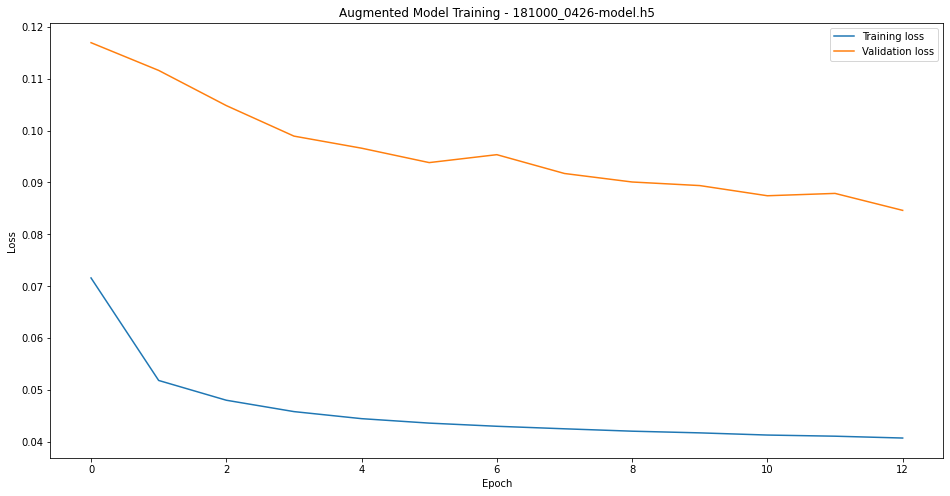

In [26]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
sinlayeraug = AutoEncoder(units_one, None, trainX, sinlayeraug_model_file, callback, DIAGRAM_FILE_PATH)

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

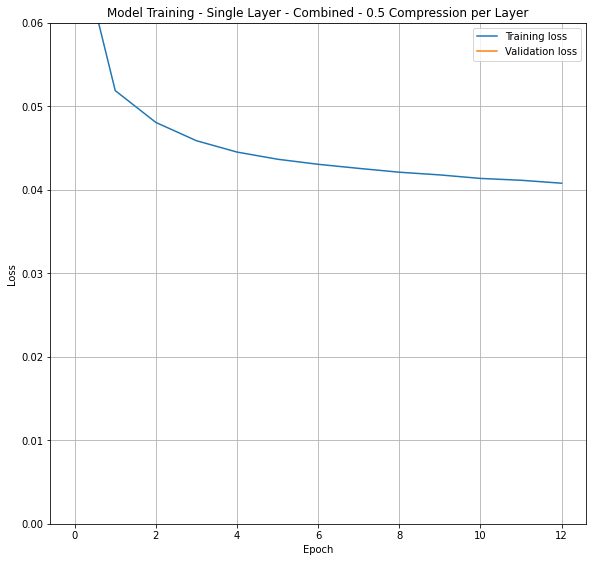

In [89]:
history_plot_and_save(sinlayeraug.history, 'Single Layer - Combined - 0.5 Compression per Layer', DIAGRAM_FILE_PATH)

## Dual - Augmented

In [27]:
duallayeraug_time_code = '181500_0426'
duallayeraug_model_file = f'{duallayeraug_time_code}-model.h5'
duallayeraug_model_file

'181500_0426-model.h5'

Checking for 181500_0426-model.h5

Double layer model built
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20, 30)            4080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 15)                2760      
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 20, 15)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20, 15)            1860      
_________________________________________________________________
lstm_9 (LSTM)                (None, 20, 30)            5520      
____________________________________________________________

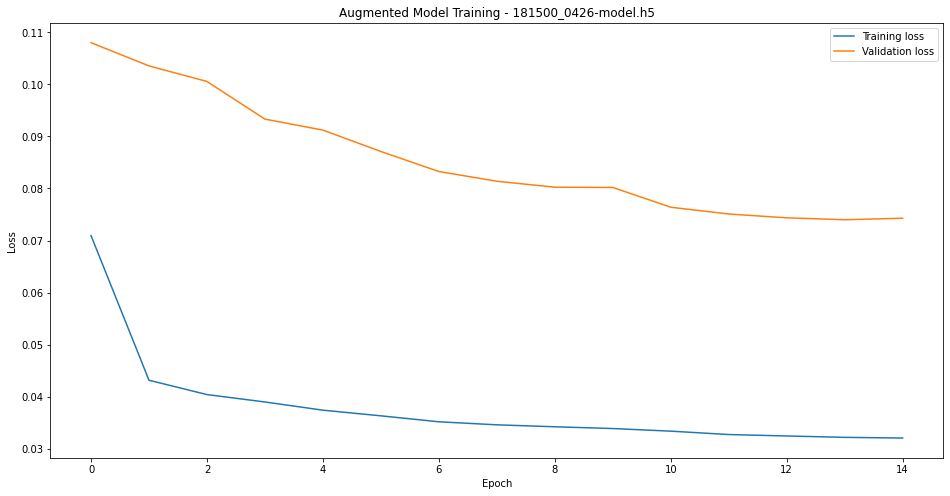

In [29]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
duallayeraug = AutoEncoder(units_one, units_two, trainX, duallayeraug_model_file, callback, DIAGRAM_FILE_PATH)

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

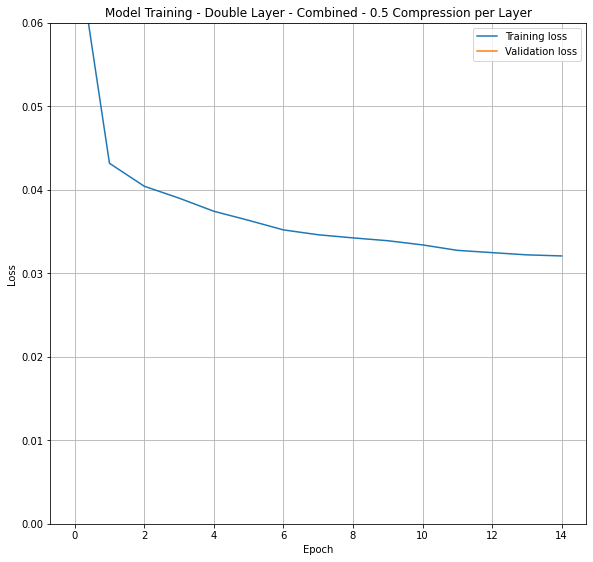

In [88]:
history_plot_and_save(duallayeraug.history, 'Double Layer - Combined - 0.5 Compression per Layer', DIAGRAM_FILE_PATH)

## Single - Patient

In [129]:
# Obtain training data
WIN_SIZE = 20
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-patient-shaved.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (38167, 20, 3)


In [31]:
sinlayerpat_time_code = '183000_0426'
sinlayerpat_model_file = f'{sinlayerpat_time_code}-model.h5'
sinlayerpat_model_file

'183000_0426-model.h5'

In [122]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
sinlayerpat = AutoEncoder(units_one, None, trainX, sinlayerpat_model_file, callback, DIAGRAM_FILE_PATH)

Checking for 183000_0426-model.h5

Model loaded from: 183000_0426-model.h5
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 30)                4080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 20, 30)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 20, 30)            7320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 20, 3)             93        
Total params: 11,493
Trainable params: 11,493

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

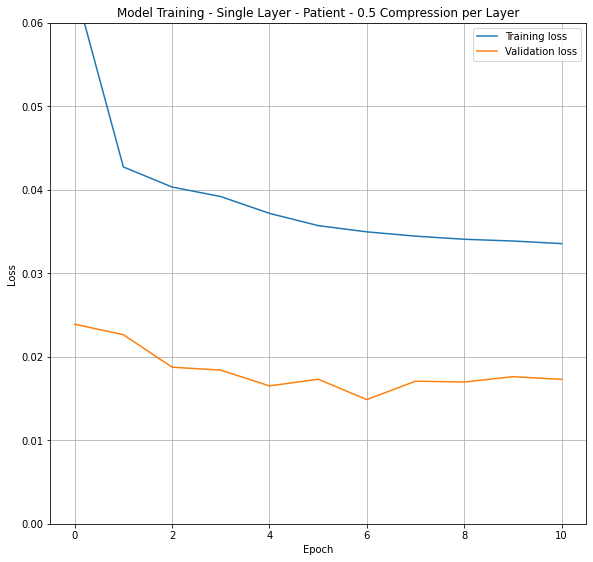

In [86]:
history_plot_and_save(sinlayerpat.history, 'Single Layer - Patient - 0.5 Compression per Layer', DIAGRAM_FILE_PATH)

In [141]:
trainPredict = sinlayerpat.model.predict(trainX)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-150-Single Layer-1.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

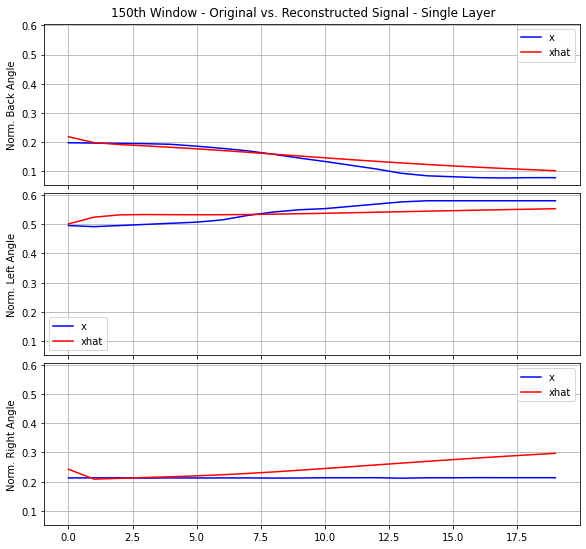

In [142]:
example_plot(150, no_feats, WIN_SIZE, trainX, trainPredict, 'Single Layer', DIAGRAM_FILE_PATH, True)

## Dual - Patient

In [128]:
duallayerpat_time_code = '183500_0426'
duallayerpat_model_file = f'{duallayerpat_time_code}-model.h5'
duallayerpat_model_file

'183500_0426-model.h5'

Checking for 183500_0426-model.h5

Double layer model built
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 30)            4080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 20, 30)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 15)                2760      
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 20, 15)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 20, 15)            1860      
_________________________________________________________________
lstm_15 (LSTM)               (None, 20, 30)            5520      
____________________________________________________________

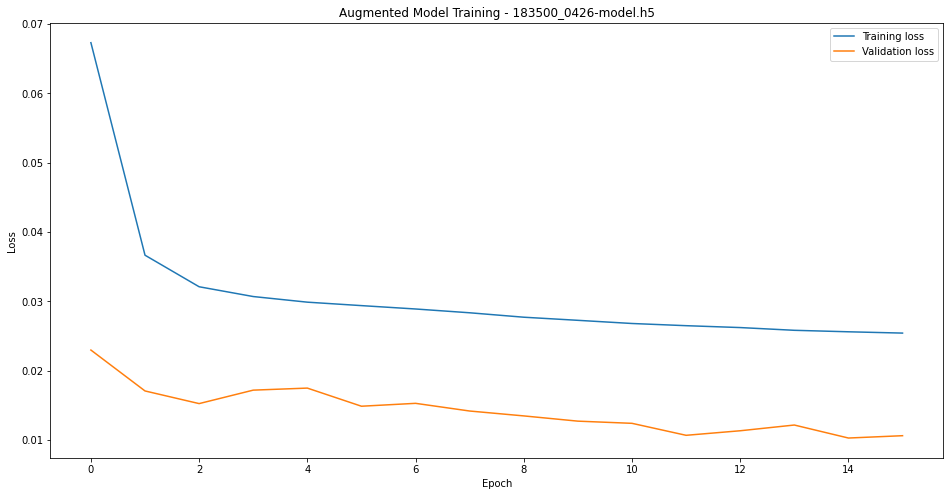

In [34]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
duallayerpat = AutoEncoder(units_one, units_two, trainX, duallayerpat_model_file, callback, DIAGRAM_FILE_PATH)

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

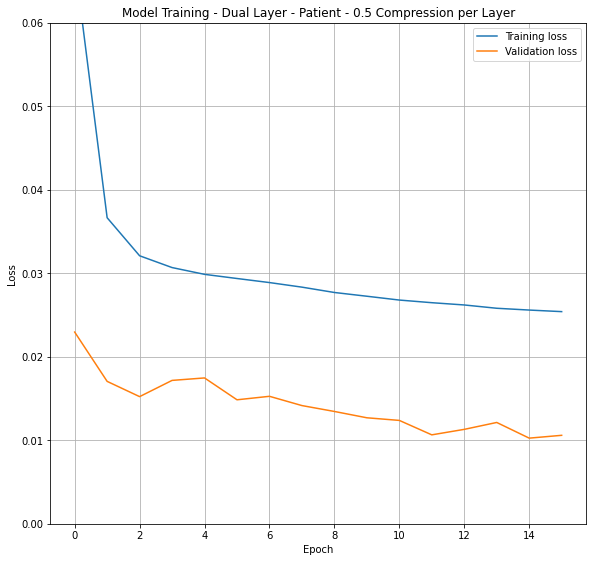

In [85]:
history_plot_and_save(duallayerpat.history, 'Dual Layer - Patient - 0.5 Compression per Layer', DIAGRAM_FILE_PATH)

In [143]:
trainPredict = duallayerpat.model.predict(trainX)


Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-150-Double Layer-1.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

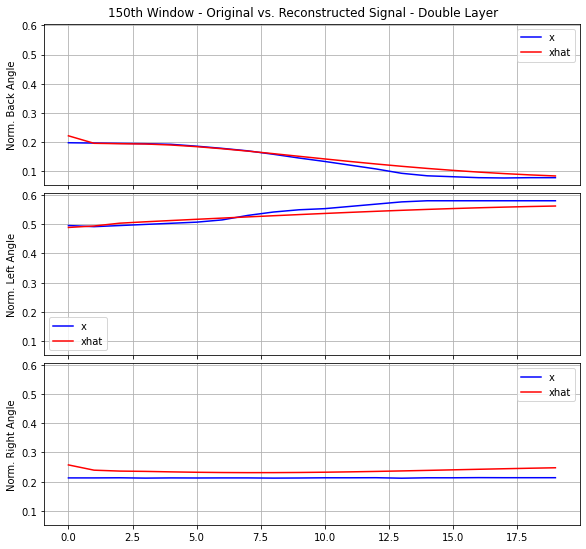

In [144]:
example_plot(150, no_feats, WIN_SIZE, trainX, trainPredict, 'Double Layer', DIAGRAM_FILE_PATH, True)

## Single - Patient - 0.75

In [52]:
compress_one = 0.75
compress_two = 0.75
units_one = int(trainX.shape[1] * trainX.shape[2] * compress_one)
units_two = int(units_one * compress_two)
print(f"1st layer units: {units_one}, 2nd layer units: {units_two}")

1st layer units: 45, 2nd layer units: 33


In [55]:
singlelpcomp_time_code = '101000_0427'
singlelpcomp_model_file = f'{singlelpcomp_time_code}-model.h5'
singlelpcomp_model_file

'101000_0427-model.h5'

Checking for 101000_0427-model.h5

Single layer model built
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 45)                8820      
_________________________________________________________________
dropout_14 (Dropout)         (None, 45)                0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 20, 45)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 20, 45)            16380     
_________________________________________________________________
dropout_15 (Dropout)         (None, 20, 45)            0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 20, 3)             138       
Total params: 25,338
Trainable params: 25,338
Non-trainable 

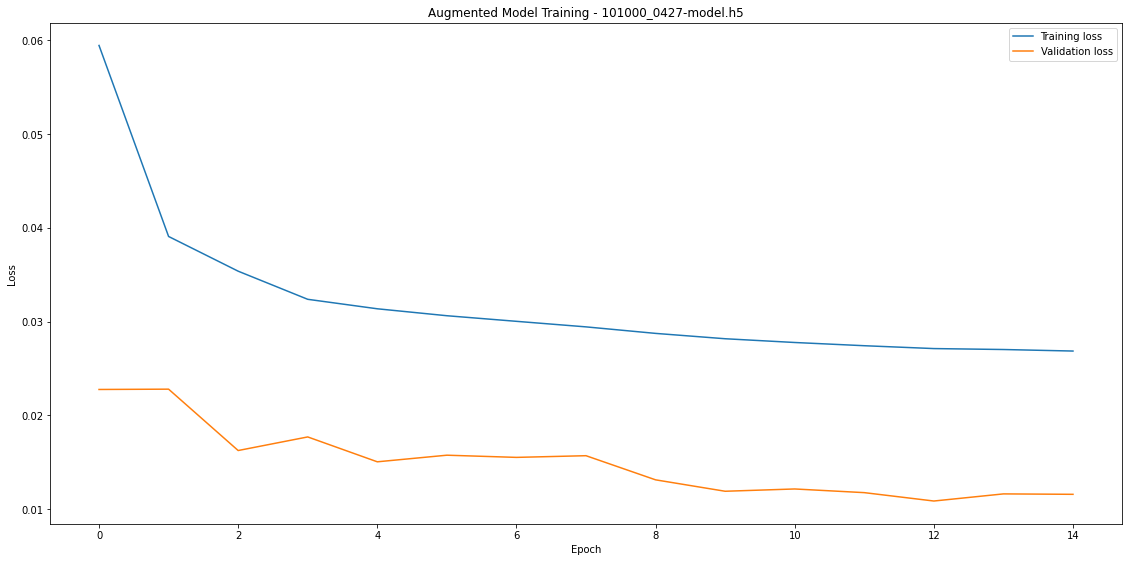

In [56]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
singlelpcomp = AutoEncoder(units_one, None, trainX, singlelpcomp_model_file, callback, DIAGRAM_FILE_PATH)

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

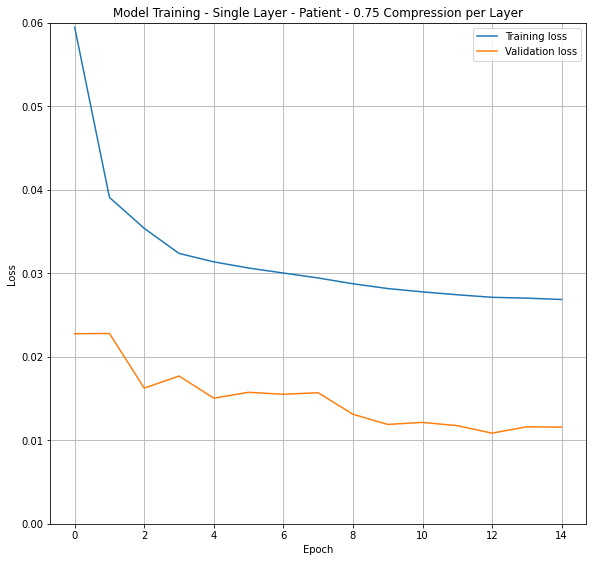

In [84]:
history_plot_and_save(singlelpcomp.history, 'Single Layer - Patient - 0.75 Compression per Layer', DIAGRAM_FILE_PATH)

## Dual - Patient - 0.75 - 0.75

In [53]:
slpcomp_time_code = '095500_0427'
slpcomp_model_file = f'{slpcomp_time_code}-model.h5'
slpcomp_model_file

'095500_0427-model.h5'

Checking for 095500_0427-model.h5

Double layer model built
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 20, 45)            8820      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 45)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 33)                10428     
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 20, 33)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 20, 33)            8844      
_________________________________________________________________
lstm_19 (LSTM)               (None, 20, 45)            14220     
____________________________________________________________

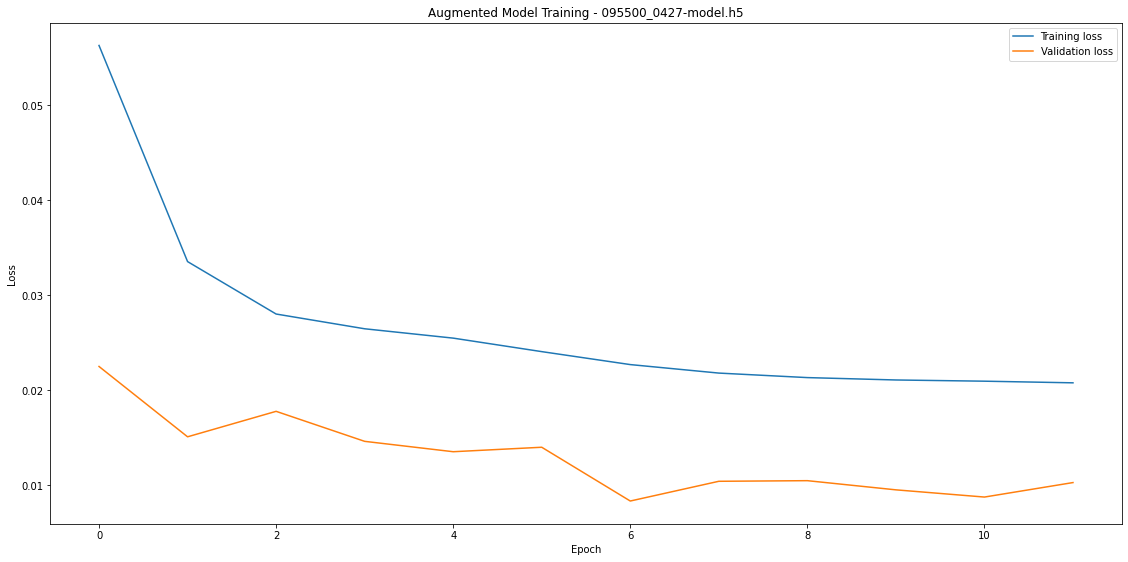

In [54]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
slpcomp = AutoEncoder(units_one, units_two, trainX, slpcomp_model_file, callback, DIAGRAM_FILE_PATH)

<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

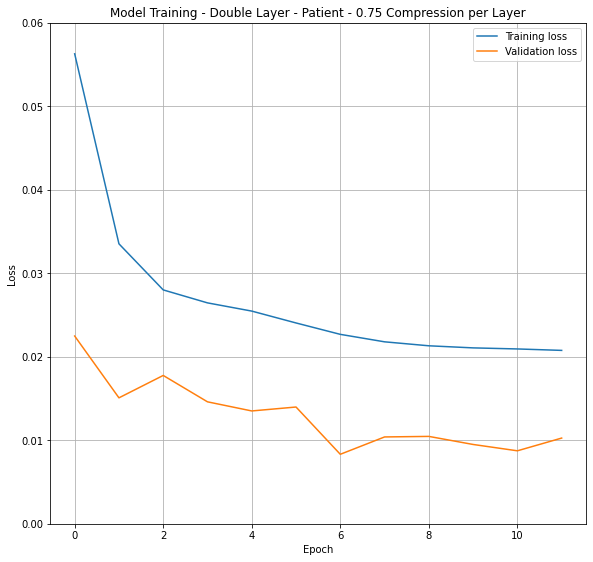

In [83]:
history_plot_and_save(slpcomp.history, 'Double Layer - Patient - 0.75 Compression per Layer', DIAGRAM_FILE_PATH)

# SEE netarch-ae for models origin

In [155]:
time_code = '164500_0416'
model_file = f'{time_code}-model.h5'
model_file

'164500_0416-model.h5'

In [158]:
# Obtain training data
WIN_SIZE = 100
file_version = f'ws{WIN_SIZE}num{no_feats}derFalse'
file_name = f'{file_version}-patient-shaved.npy'
path = DATA_FILE_PATH + file_name
trainX = np.load(path)
print(f'Number of control training samples: {trainX.shape}')

Number of control training samples: (38087, 100, 3)


In [156]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
model = AutoEncoder(None, None, None, model_file, None, DIAGRAM_FILE_PATH)

Checking for 164500_0416-model.h5

Model loaded from: 164500_0416-model.h5
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 100, 128)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 128)          131584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 100, 3)            387       
Total params: 199,555
Trainable params: 199,5

In [170]:
trainPredict = model.model.predict(trainX)

In [249]:
predict_mean = recombine_signals(trainPredict)

(38087, 100, 3)


In [340]:
predict_med = recombine_signals(trainPredict, 'mean')

(38187, 3)


In [341]:
predict_med

array([[0.2864964 , 0.24519804, 0.10183409],
       [0.43878752, 0.36712344, 0.14924844],
       [0.51997237, 0.42494022, 0.17250922],
       ...,
       [0.47470793, 0.24624399, 0.35030712],
       [0.31150728, 0.16392669, 0.23307124],
       [0.        , 0.        , 0.        ]])

In [365]:
df.loc[:, ['back_hat', 'left_hat', 'right_hat']] = predict_med
df

,back_angle,left_angle,right_angle,Date,back_hat,left_hat,right_hat
0,0.424307,0.572584,0.215395,2011-12-01 11:04:05.000,0.286496,0.245198,0.101834
1,0.456290,0.568733,0.200416,2011-12-01 11:04:05.050,0.438788,0.367123,0.149248
2,0.488273,0.564883,0.200416,2011-12-01 11:04:05.100,0.519972,0.424940,0.172509
3,0.530917,0.557181,0.201110,2011-12-01 11:04:05.150,0.562957,0.451850,0.184225
4,0.573561,0.541779,0.200416,2011-12-01 11:04:05.200,0.584914,0.463785,0.190520
...,...,...,...,...,...,...,...
38182,0.626866,0.276088,0.527046,2011-12-01 11:35:54.100,0.606110,0.308116,0.442211
38183,0.626866,0.276088,0.525659,2011-12-01 11:35:54.150,0.560900,0.287497,0.410307
38184,0.616205,0.276088,0.524272,2011-12-01 11:35:54.200,0.474708,0.246244,0.350307
38185,0.616205,0.276088,0.524272,2011-12-01 11:35:54.250,0.311507,0.163927,0.233071


In [385]:
# Reload libraries when changes have been made to them
%reload_ext autoreload


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

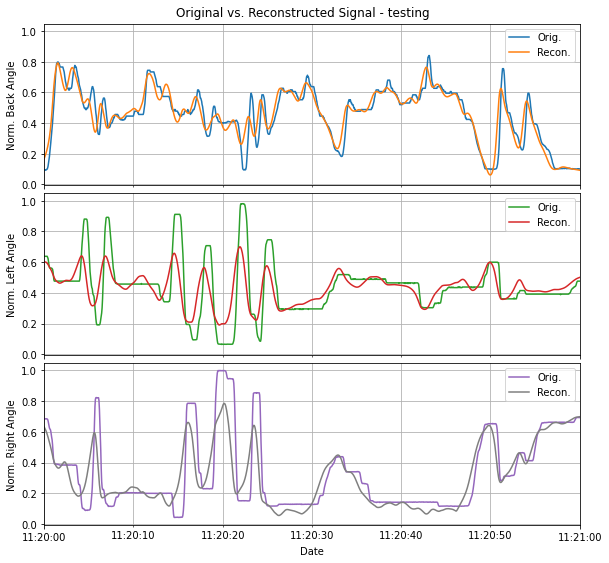

In [396]:
start = datetime.datetime(2011, 12, 1, 11, 20, 00)
end = datetime.datetime(2011, 12, 1, 11, 21, 00)
# start = None
# end = None
full_reconstruct_plot(df, 'mean', 'testing', DIAGRAM_FILE_PATH, start, end, False)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-200-Single Layer.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

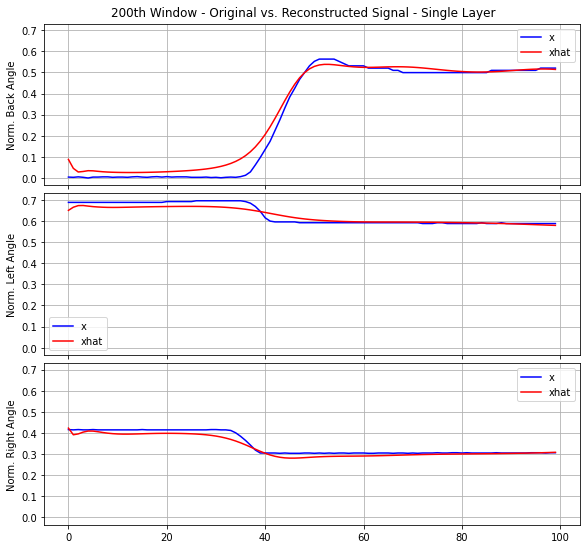

In [392]:
example_plot(200, no_feats, WIN_SIZE, trainX, trainPredict, 'Single Layer', DIAGRAM_FILE_PATH, True)

In [162]:
time_code = '111500_0417'
dual_model_file = f'{time_code}-model.h5'
dual_model_file

'111500_0417-model.h5'

In [163]:
time_code = '164500_0416'
dual_model_file = f'{time_code}-model.h5'
dual_model_file

Checking for 111500_0417-model.h5

Model loaded from: 111500_0417-model.h5
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100, 128)          67584     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 128)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 100, 64)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 64)           33024     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100, 128)          98816     
_____________________________________________

In [165]:
# Fit the model
callback = EarlyStopping(monitor='loss', patience=3, min_delta=1e-3)
dual_model = AutoEncoder(None, None, None, dual_model_file, None, DIAGRAM_FILE_PATH)

Saved as: /Users/jamesmeyer/University of Bath/Patient Simulator FYP - General/diagrams/report/eg-window-150-Double Layer-2.png


<module 'matplotlib.pyplot' from '/Users/jamesmeyer/.pyenv/versions/fyp-env/lib/python3.9/site-packages/matplotlib/pyplot.py'>

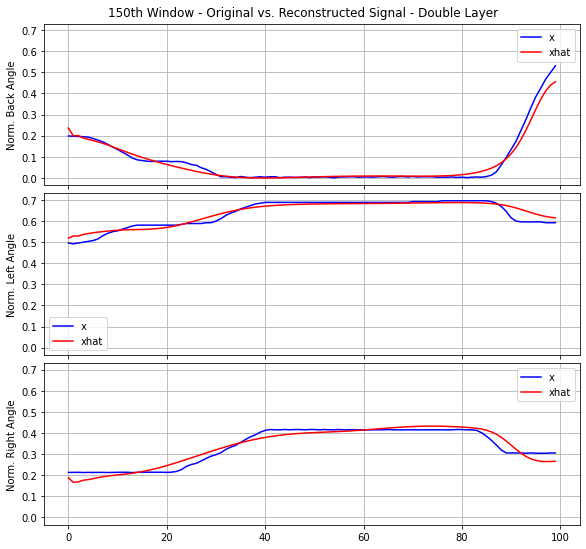

In [168]:
dual_trainPredict = dual_model.model.predict(trainX)

In [ ]:
example_plot(150, no_feats, WIN_SIZE, trainX, dual_trainPredict, 'Double Layer', DIAGRAM_FILE_PATH, True)